# Identifying hand written digits
using tensorflow

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [45]:
file_path = 'mnist.npz'

with np.load(file_path) as data:
    X_train = data['x_train']
    y_train = data['y_train']
    X_test = data['x_test']
    y_test = data['y_test']

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data() #SSL issue in using this method

In [12]:
len(X_train)

60000

In [17]:
X_train[0].shape


(28, 28)

In [40]:
X_train[0] #this is what the image at 0th index in the dataset we have downloaded looks like in vecctor form

array([  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
       253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
         0,   0], dtype=uint8)

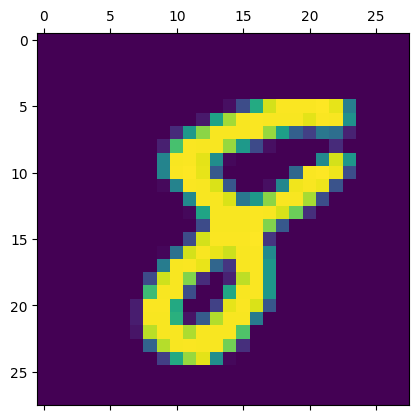

In [23]:
plt.matshow(X_train[777])

In [28]:
#now we flatten the array into a 2D array for computation
F_X_trained = X_train.reshape(len(X_train),28*28) #here we used 60000 as one dimention and 28x28 as the second
F_X_test = X_test.reshape(len(X_test),28*28)
F_X_trained[0],F_X_test[0]

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
        126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  30,  36

# Model Training in Keras

In [31]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape= (784,), activation="sigmoid") #here 10 is the output layer neurons
    #784 is the input size, and activation function is sigmoid
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(F_X_trained,y_train,epochs = 15) #epochs is the number of iterations for which the NN runs the training

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7667 - loss: 19.2028
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8794 - loss: 5.9005
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8830 - loss: 5.6657
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8858 - loss: 5.3784
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8878 - loss: 5.2949
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8890 - loss: 5.3296
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8931 - loss: 5.1576
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8911 - loss: 5.0692
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8917 - loss: 5.1556
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8905 - loss: 5.1179
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8896 - loss: 5.1627
Epoch 12/15
1875/1875 ━━━━

scaling is a technique which improves the efficiency of an ML model,so if we scale the training dataset between 0 and one we can have better accuracy. That will be done by dividing the data set by 255, since we know the dataset matriz range from 0 to 255

In [46]:
X_train = X_train / 255
X_test = X_test / 255
F_X_trained = X_train.reshape(len(X_train),28*28) #here we used 60000 as one dimention and 28x28 as the second
F_X_test = X_test.reshape(len(X_test),28*28)
F_X_trained[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [47]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape= (784,), activation="sigmoid") #here 10 is the output layer neurons
    #784 is the input size, and activation function is sigmoid
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(F_X_trained,y_train,epochs = 5)

#this is giving better result in less epochs 

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8123 - loss: 0.7290
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9129 - loss: 0.3064
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9201 - loss: 0.2870
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9232 - loss: 0.2728
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9261 - loss: 0.2637


In [48]:
#evaluating the model at a testing data set
model.evaluate(F_X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9144 - loss: 0.3052


[0.2695808410644531, 0.925599992275238]

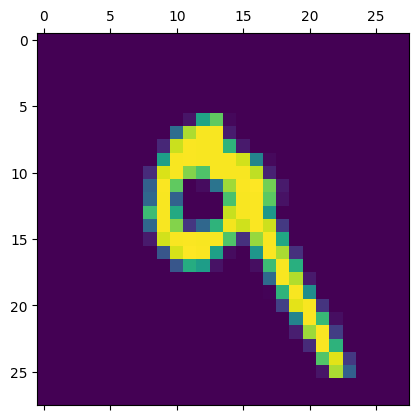

In [59]:
plt.matshow(X_test[7])

In [60]:
y_predicted = model.predict(F_X_test)
y_predicted[7]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.3881751e-06, 2.2772373e-01, 8.3627198e-03, 2.5560506e-02,
       3.0138278e-01, 2.1107252e-01, 9.9029229e-04, 1.8236162e-02,
       1.5098855e-01, 9.7615021e-01], dtype=float32)

In [63]:
np.argmax(y_predicted[7])

9

Now to make a confusion matrix of the y_test and y_predicted we need to lable them as whole value now an array of outputs, so we have to find argmax of every predicted value in the x_test

In [64]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels 
# basically these are the indices of the max element in the matrix of 10 output neuron which basically represents the number in the picture

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 0,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 4,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [65]:
#tensorflow confusion matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels)
cm #this is confusion matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   5,    9,  929,   12,    8,    5,   10,    9,   41,    4],
       [   4,    0,   18,  904,    0,   32,    1,   10,   33,    8],
       [   2,    1,    5,    1,  913,    0,    8,    3,   12,   37],
       [  10,    3,    3,   22,   10,  780,   12,    6,   39,    7],
       [  12,    3,    9,    1,    8,   19,  899,    2,    5,    0],
       [   1,    8,   23,    7,    8,    1,    0,  931,    6,   43],
       [   6,    7,    6,   15,    9,   18,    5,    6,  895,    7],
       [  10,    7,    1,    7,   22,    6,    0,   13,   12,  931]],
      dtype=int32)>

In [67]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Text(95.72222222222221, 0.5, 'actual')

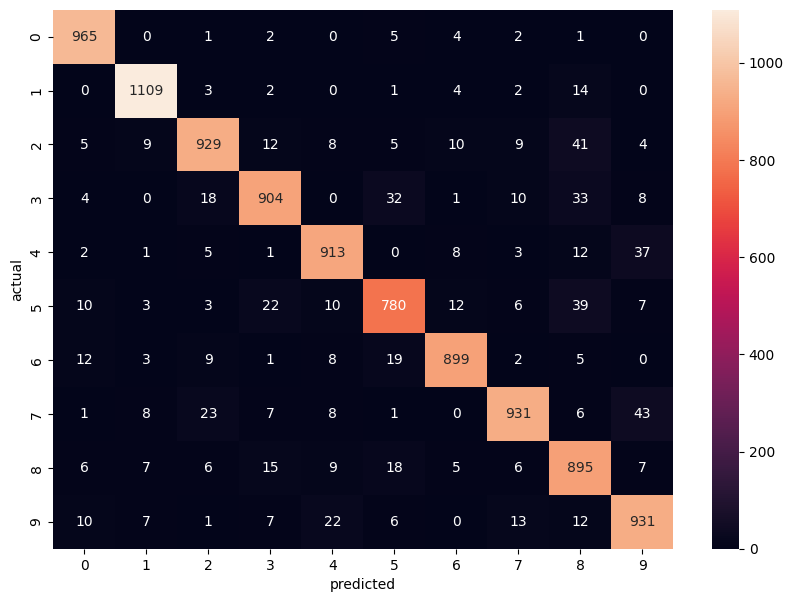

In [68]:
#for better representation we are using seaborn library
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt = 'd')
plt.xlabel("predicted")
plt.ylabel("actual")

To further improve the accuracy of the model we can simply add another hidden layer into the model training

In [69]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape= (784,), activation="relu"), #here we are using relu activation function
    keras.layers.Dense(10, activation="sigmoid")
    #we can always add more hidden layer in this for better model training
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(F_X_trained,y_train,epochs = 5)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8733 - loss: 0.4520
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9591 - loss: 0.1397
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9724 - loss: 0.0907
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9797 - loss: 0.0678
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9852 - loss: 0.0506


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


Text(95.72222222222221, 0.5, 'actual')

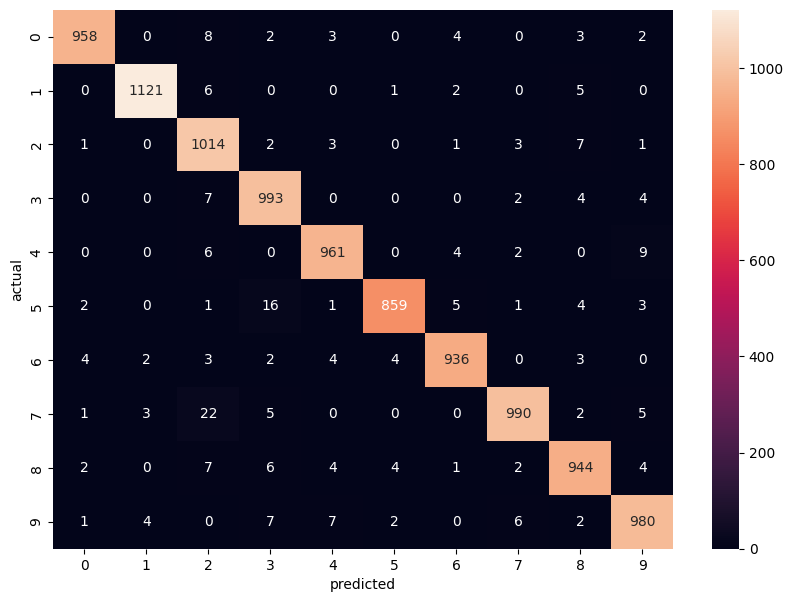

In [70]:
y_predicted = model.predict(F_X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt = 'd')
plt.xlabel("predicted")
plt.ylabel("actual")
#In a perfect scenario  these black boxes in the confusion matrix will always be zero but that's near to impossible

Above we made flatten array, but keras also provides a layer where we can simply put in the training dataset for the prediction, 

In [72]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # here 28,28 is the dimesnion of the image we are providing
    keras.layers.Dense(100, activation="relu"), #here we are using relu activation function
    keras.layers.Dense(10, activation="sigmoid")
    #we can always add more hidden layer in this for better model training
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8717 - loss: 0.4559
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9617 - loss: 0.1308
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9738 - loss: 0.0871
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9809 - loss: 0.0629
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9841 - loss: 0.0508


# #Day12

Activation Function

In [73]:
#without activation function the system just becomes a linear equation
#but in the real world the not everything can be resolved by linear equations